# Boston Food Violation Analysis

Import necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\69018\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\69018\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load data

In [4]:
data = pd.read_csv('C://Users//69018//Desktop//VL folder//CAPSTONE//tmppgx_njve.csv',encoding = "ISO-8859-1")

C:\Users\69018\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Check if data is loaded

In [5]:
data.head()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"


# Data Exploration
to see null values/columns that are useful etc



In [6]:
data.columns

Index(['businessname', 'dbaname', 'legalowner', 'namelast', 'namefirst',
       'licenseno', 'issdttm', 'expdttm', 'licstatus', 'licensecat',
       'descript', 'result', 'resultdttm', 'violation', 'viollevel',
       'violdesc', 'violdttm', 'violstatus', 'statusdate', 'comments',
       'address', 'city', 'state', 'zip', 'property_id', 'location'],
      dtype='object')

Null Value Summary of columns

In [7]:
data.isnull().sum()

businessname         0
dbaname         579826
legalowner      180175
namelast             0
namefirst          114
licenseno            0
issdttm              0
expdttm              0
licstatus            0
licensecat           0
descript             0
result               0
resultdttm           0
violation        32770
viollevel        32770
violdesc         32781
violdttm             0
violstatus       32770
statusdate      341880
comments             4
address              0
city                27
state                0
zip                235
property_id     130968
location        166357
dtype: int64

Check license status of restaurants 
(decide to only count the active licenses)

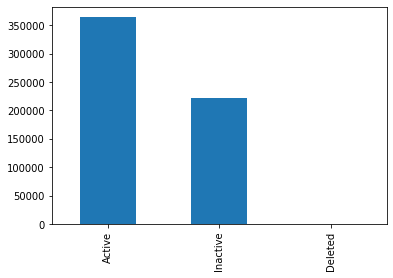

In [8]:
data['licstatus'].value_counts().plot.bar()

Use only active restaurants

In [9]:
active=data[data['licstatus'] =='Active']

In [10]:
active.head()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"


In [11]:
active=active.reset_index()

In [12]:
active=active.drop(['index'],axis=1)

In [13]:
active.head()

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"


Violations within Active restaurants

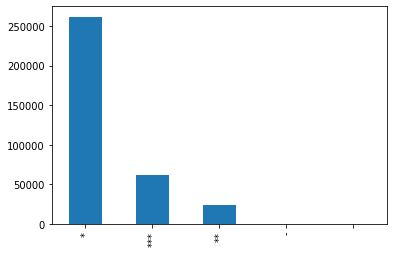

In [14]:
active['viollevel'].value_counts().plot.bar()

Missing Values within Active Restaurants

Text(0.5, 1.0, 'counts of missing value')

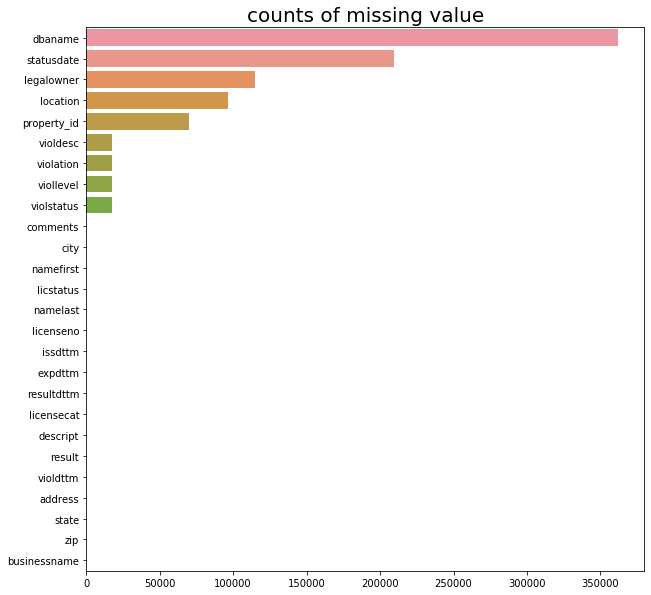

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(x=active.isnull().sum().sort_values(ascending=False),y=active.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value",size=20)

In [16]:
active['violstatus'].count()

346914

In [17]:
active['businessname'].value_counts()

Dunkin Donuts                           2190
Subway                                  1843
The Real Deal                           1454
Dunkin' Donuts                          1282
Burger King                             1003
                                        ... 
Good Bite                                  1
Hudson No. 1945                            1
Berkshire Farms Market A                   1
Charlestown Youth Hockey Association       1
Casarecce Cucina Italiana                  1
Name: businessname, Length: 3465, dtype: int64

Drop Duplicates 

In [18]:
active_clean=active.drop_duplicates()

Duplicate Differences

In [19]:
len(active)-len(active_clean)

8

After removing duplicates, indices must be reset 

In [20]:
active_clean=active_clean.reset_index()

In [21]:
active_clean.head()

,index,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,...,2/15/2013 12:19,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
1,1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,...,2/15/2013 12:19,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
2,2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,...,2/15/2013 12:19,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
3,3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,...,2/15/2013 12:19,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
4,4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,...,2/15/2013 12:19,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"


Remove the extra column 

In [22]:
active_clean.drop(['index'],axis=1,inplace=True)

In [23]:
active_clean

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,4/5/2013 12:47,12/31/2019 23:59,Active,FS,...,2/15/2013 12:19,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,2131,77476,"(42.278590000, -71.119440000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364220,Zume's Coffee House,NaN,KERRIGAN ROBERT,Doherty,John,27260,2/6/2012 10:50,12/31/2019 23:59,Active,FT,...,2/6/2015 11:12,Pass,2/6/2015 14:26,Clean smooth durable and non-absorbant surf...,219 Main ST,Charlestown,MA,2129,88457,"(42.376540000, -71.065421000)"
364221,Zume's Coffee House,NaN,KERRIGAN ROBERT,Doherty,John,27260,2/6/2012 10:50,12/31/2019 23:59,Active,FT,...,3/16/2016 10:20,Pass,3/17/2016 8:31,High temp dish machine wash 135F rinse 150F / ...,219 Main ST,Charlestown,MA,2129,88457,"(42.376540000, -71.065421000)"
364222,Zume's Coffee House,NaN,KERRIGAN ROBERT,Doherty,John,27260,2/6/2012 10:50,12/31/2019 23:59,Active,FT,...,,NaN,NaN,,219 Main ST,Charlestown,MA,2129,88457,"(42.376540000, -71.065421000)"
364223,Zume's Coffee House,NaN,KERRIGAN ROBERT,Doherty,John,27260,2/6/2012 10:50,12/31/2019 23:59,Active,FT,...,8/6/2018 14:11,Pass,8/7/2018 8:30,The front refrigerator is running warm; almond...,219 Main ST,Charlestown,MA,2129,88457,"(42.376540000, -71.065421000)"


N-gram Exploration

In [75]:
corpus = []
for i in range(0, 10):
    try:
        review = re.sub('[^a-zA-Z]', ' ', active_clean['comments'][i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    except:
        corpus.append('No Comments')
    print(i)

0
1
2
3
4
5
6
7
8
9


In [76]:
corpus

['provid glass storag rack',
 'provid dish rack bay sink replac miss drainboard end bay sink',
 'provid dish washer ware wash area',
 'provid mop sink basement',
 'hand sink bar area provid',
 'provid door finish miscellan storag room',
 'provid dish washer ware wash area',
 'provid chef thermomet monitor food temperatur',
 'replac heavili scord cut board',
 'dishmachin oper repair']

In [77]:
cv = CountVectorizer(max_features = 10)

In [78]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [79]:
x = cv.fit_transform(corpus).toarray()

In [80]:
x

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 2, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

Bigram
https://stackoverflow.com/questions/21844546/forming-bigrams-of-words-in-list-of-sentences-with-python

In [81]:
corpus_bi=[]
for line in corpus:
    token=nltk.word_tokenize(line)
    bigram=list(ngrams(token,2))
    corpus_bi.append(bigram)

In [82]:
corpus_bi

[[('provid', 'glass'), ('glass', 'storag'), ('storag', 'rack')],
 [('provid', 'dish'),
  ('dish', 'rack'),
  ('rack', 'bay'),
  ('bay', 'sink'),
  ('sink', 'replac'),
  ('replac', 'miss'),
  ('miss', 'drainboard'),
  ('drainboard', 'end'),
  ('end', 'bay'),
  ('bay', 'sink')],
 [('provid', 'dish'),
  ('dish', 'washer'),
  ('washer', 'ware'),
  ('ware', 'wash'),
  ('wash', 'area')],
 [('provid', 'mop'), ('mop', 'sink'), ('sink', 'basement')],
 [('hand', 'sink'), ('sink', 'bar'), ('bar', 'area'), ('area', 'provid')],
 [('provid', 'door'),
  ('door', 'finish'),
  ('finish', 'miscellan'),
  ('miscellan', 'storag'),
  ('storag', 'room')],
 [('provid', 'dish'),
  ('dish', 'washer'),
  ('washer', 'ware'),
  ('ware', 'wash'),
  ('wash', 'area')],
 [('provid', 'chef'),
  ('chef', 'thermomet'),
  ('thermomet', 'monitor'),
  ('monitor', 'food'),
  ('food', 'temperatur')],
 [('replac', 'heavili'),
  ('heavili', 'scord'),
  ('scord', 'cut'),
  ('cut', 'board')],
 [('dishmachin', 'oper'), ('oper', '

Vectorize before training model 
https://stackoverflow.com/questions/27454767/how-to-vectorize-labeled-bigrams-with-scikit-learn/27455105#27455105

In [83]:
count_vect = CountVectorizer(preprocessor=lambda x:x,
                                 tokenizer=lambda x:x)

In [84]:
cv_bi = count_vect.fit_transform(doc[:-1] for doc in corpus_bi).toarray()

In [87]:
count_vect.vocabulary_

{('provid', 'glass'): 20,
 ('glass', 'storag'): 10,
 ('provid', 'dish'): 18,
 ('dish', 'rack'): 3,
 ('rack', 'bay'): 22,
 ('bay', 'sink'): 1,
 ('sink', 'replac'): 27,
 ('replac', 'miss'): 24,
 ('miss', 'drainboard'): 14,
 ('drainboard', 'end'): 7,
 ('end', 'bay'): 8,
 ('dish', 'washer'): 4,
 ('washer', 'ware'): 30,
 ('ware', 'wash'): 29,
 ('provid', 'mop'): 21,
 ('mop', 'sink'): 16,
 ('hand', 'sink'): 11,
 ('sink', 'bar'): 26,
 ('bar', 'area'): 0,
 ('provid', 'door'): 19,
 ('door', 'finish'): 6,
 ('finish', 'miscellan'): 9,
 ('miscellan', 'storag'): 13,
 ('provid', 'chef'): 17,
 ('chef', 'thermomet'): 2,
 ('thermomet', 'monitor'): 28,
 ('monitor', 'food'): 15,
 ('replac', 'heavili'): 23,
 ('heavili', 'scord'): 12,
 ('scord', 'cut'): 25,
 ('dishmachin', 'oper'): 5}

In [88]:
cv_bi

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0,

In [89]:
[doc[:-1] for doc in corpus_bi]

[[('provid', 'glass'), ('glass', 'storag')],
 [('provid', 'dish'),
  ('dish', 'rack'),
  ('rack', 'bay'),
  ('bay', 'sink'),
  ('sink', 'replac'),
  ('replac', 'miss'),
  ('miss', 'drainboard'),
  ('drainboard', 'end'),
  ('end', 'bay')],
 [('provid', 'dish'),
  ('dish', 'washer'),
  ('washer', 'ware'),
  ('ware', 'wash')],
 [('provid', 'mop'), ('mop', 'sink')],
 [('hand', 'sink'), ('sink', 'bar'), ('bar', 'area')],
 [('provid', 'door'),
  ('door', 'finish'),
  ('finish', 'miscellan'),
  ('miscellan', 'storag')],
 [('provid', 'dish'),
  ('dish', 'washer'),
  ('washer', 'ware'),
  ('ware', 'wash')],
 [('provid', 'chef'),
  ('chef', 'thermomet'),
  ('thermomet', 'monitor'),
  ('monitor', 'food')],
 [('replac', 'heavili'), ('heavili', 'scord'), ('scord', 'cut')],
 [('dishmachin', 'oper')]]

In [90]:
test_bi=pd.DataFrame(cv_bi)

In [97]:
test_bi['violstatus']=active_clean['violstatus'][:10]

In [98]:
test_bi['licstatus']=active_clean['licstatus'][:10]

In [99]:
test_bi

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,licstatus,violstatus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Active,Fail
1,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,Active,Fail
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,Active,Fail
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Active,Fail
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Active,Fail
5,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,Active,Fail
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,Active,Fail
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Active,Fail
8,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,Active,Fail
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Active,Fail


Put in Dataframe 